# Mashion Mnist dataset 

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

## Constants

In [2]:
LABEL_DICT = {
    "0" : "T-shirt/top",
    "1" : "Trouser",
    "2" : "Pullover",
    "3" : "Dress",
    "4" : "Coat",
    "5" : "Sandal",
    "6" : "Shirt",
    "7" : "Sneaker",
    "8" : "Bag",
    "9" : "Ankle boot",
}
TEST_SIZE = 0.2
VAL_SIZE = 0.2
RANDOM_STATE = 42
ROTATION_RANGE = 10
WIDTH_SHIFT_RANGE = 0.2
HEIGHT_SHIFT_RANGE = 0.2
ZOOM_RANGE = 0.2
HORIZONTAL_FLIP = True
BATCH_SIZE = 1028
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
LOSS = "sparse_categorical_crossentropy"
METRICS = ["accuracy"]
EPOCHS = 100
VERBOSE = 1

## Load data

In [3]:
train_df = pd.read_csv('data/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('data/fashion-mnist_test.csv', sep = ',')

## Describe data

In [4]:
print(train_df.shape)
train_df.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(test_df.shape)
test_df.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

### Concat dataset

In [6]:
total_df = pd.concat([train_df, test_df], axis=0)
print(total_df.shape)

(70000, 785)


### Separate images and labels

In [7]:
X_df = total_df.drop('label', axis=1)
y_df = total_df['label']

### Convert data in nupmy array

In [8]:
X_array = np.array(X_df, dtype = 'float32')
y_array = np.array(y_df, dtype = 'float32')

print(X_array.shape)
print(y_array.shape)

(70000, 784)
(70000,)


### Data split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

## Data augmentation

In [10]:
""" X_train_augmented = ImageDataGenerator(
        rotation_range=ROTATION_RANGE,
        width_shift_range=WIDTH_SHIFT_RANGE,
        height_shift_range=HEIGHT_SHIFT_RANGE,
        zoom_range=ZOOM_RANGE,
        horizontal_flip=HORIZONTAL_FLIP,
).flow(X_train, y_train, batch_size=BATCH_SIZE) """
X_train_augmented = ImageDataGenerator(
        rescale=1/255
).flow(X_train, y_train, batch_size=BATCH_SIZE)

X_val_scaled = X_val / 255

X_test_scaled = X_test / 255


## Model

### Create model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

### Fit

In [12]:
history = model.fit(X_train_augmented, epochs=EPOCHS, validation_data=(X_val_scaled, y_val), verbose=VERBOSE)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.3693 - loss: 1.7072 - val_accuracy: 0.7468 - val_loss: 0.7018
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7263 - loss: 0.7582 - val_accuracy: 0.7886 - val_loss: 0.5708
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.7697 - loss: 0.6289 - val_accuracy: 0.8123 - val_loss: 0.5086
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7976 - loss: 0.5555 - val_accuracy: 0.8163 - val_loss: 0.4793
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.8085 - loss: 0.5229 - val_accuracy: 0.8328 - val_loss: 0.4507
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8236 - loss: 0.4827 - val_accuracy: 0.8413 - val_loss: 0.4307
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8314 - loss: 0.4579 - val_accuracy: 0.8510 - val_loss: 0.4060
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8426 - loss: 0.4359 - val_accu

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,311,680 (5.00 MB)

 Trainable params: 437,226 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 874,454 (3.34 MB)

## Results

### Learning curve

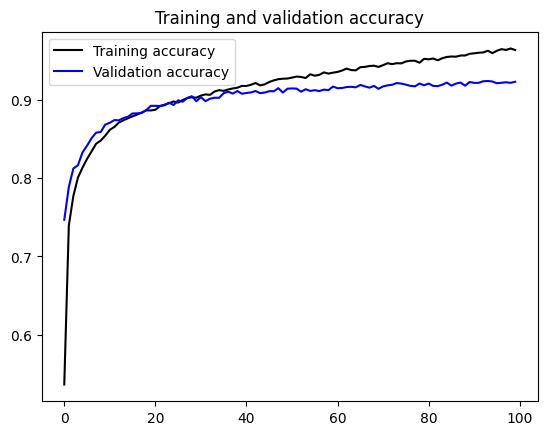

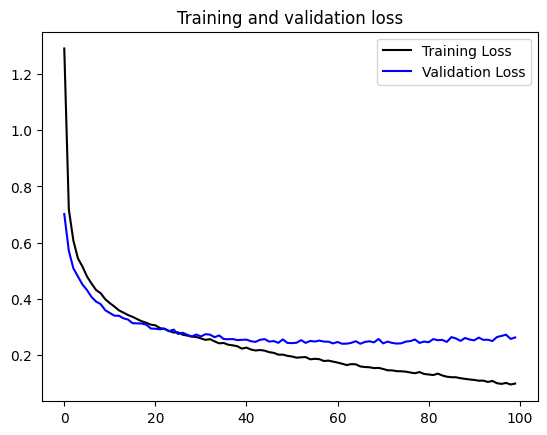

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='black', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Confusion Matrix

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.916


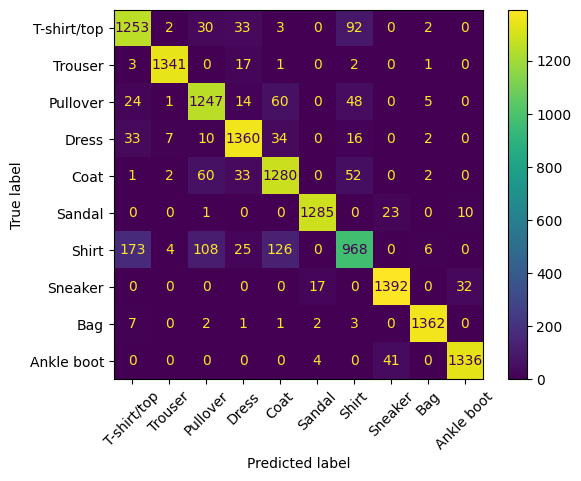

In [15]:
y_pred = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABEL_DICT.values())
ax = disp.plot().ax_
plt.xticks(rotation=45)

print(f"Accuracy: {accuracy:.3f}")
plt.show()